# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

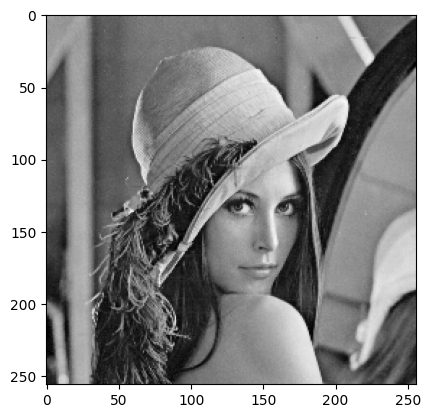

In [5]:
imglena = plt.imread("data/lena.png")
plt.imshow(imglena, "gray")


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [6]:
def meanfilter(img, size):
    img_filtered = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] -n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[p[0] + q[0] -n, p[1] + q[1] -n]
            img_filtered[p[0], p[1]] = neighborhood_sum / size ** 2
    return img_filtered

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

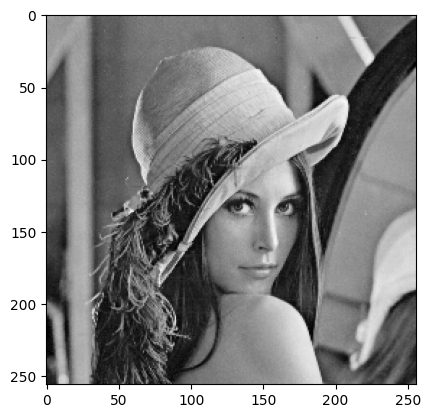

In [7]:
imglenacop1 = imglena.copy()
meanfilter(imglenacop1, size=5)
plt.imshow(imglenacop1, "gray")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [8]:
imglenacop2 = meanfilter(imglena.copy(), 5) 

lenameanfilter5 = plt.imread("data/lena_meanfilter5.png")

assert numpy.allclose(imglenacop2, lenameanfilter5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [9]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    # write your code here
    return result

In [27]:
def medianfilter(img, size):
    %pylab
    %matplotlib inline
    img_filtered = numpy.zeros(img.shape)
    n = 3
    N = 2*n + 1
    for p in numpy.ndindex(img.shape[0]-2*n, img.shape[1]- 2*n):
        values = img[p[0]+N, p[1]:p[1]+N]
        flatten(seq=values)
        values.sort(0)
        img_filtered[p[0]+n, p[1]+n] = values[len(values)//2]
    return img_filtered

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

In [28]:
imglenacop3 = imglena.copy()
medianfilter(imglenacop3, size = 5)
plt.imshow(imglenacop3, "gray")

Using matplotlib backend: agg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


IndexError: index 256 is out of bounds for axis 0 with size 256

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [29]:
imglenacop4 = medianfilter(imglena.copy(), 5) 

lenamedianfilter5 = plt.imread("data/lena_medianfilter5.png")

assert numpy.allclose(imglenacop4, lenamedianfilter5, atol=1/255)

Using matplotlib backend: agg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


IndexError: index 256 is out of bounds for axis 0 with size 256

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [ ]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [30]:
copmean = scipy.ndimage.uniform_filter(imglena.copy, size = 5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

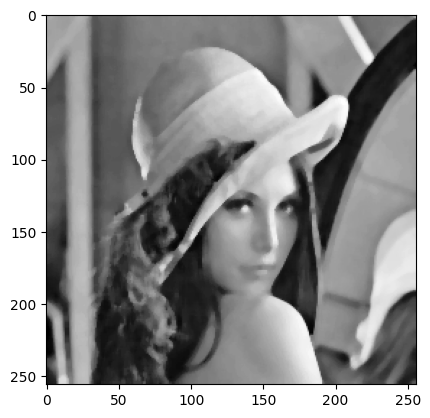

In [31]:
copmedian = scipy.ndimage.median_filter(imglena.copy(), size = 5)
plt.imshow(copmedian, "gray")

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [ ]:
copgaus = scipy.ndimage.gaussian_filter(imglena.copy, sigma = 3)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [34]:
def fastfilter(img, size):
    reuslt = numpy.zeros(img.shape)
    n = (size-1) // 2
    for p in numpy.index(img.shape):
        if p[0] < n or p[1] < n or p[0] >= img.shape[0] - n or p[1] >= img.shape[1] - n:
            continue
        neigborhood = img[p[0] - n: p[0] + n, p[1] - n: p[1] + n]
        result[p] = neigborhood.mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

In [35]:
fast_filtered = fastfilter(img=imglena.copy, size = 5)
plt.imshow(fast_filtered)

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: